### **Here 3 different grids will be compared:**
1. Uniformal grid.
2. Grid based on the roots of Chebyshev polinomial.
3. Grid based on the points obtained via **maxvol.**

In [27]:
import numpy as np
import scipy
from maxvolpy.maxvol import maxvol
from numpy.polynomial import Chebyshev as T
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

# each of these functions returns pivote row indices of the matrix T for further c-column calculation 

def uniformal_points(arr, num_of_points):
    row_indx = np.arange(num_of_points) * np.int(np.floor(len(arr) / num_of_points))
    return row_indx

def quasi_chebyshev_points(arr, num_of_points):
    row_indx = np.zeros(num_of_points).astype(int)
    x_cheb = (T.basis(num_of_points, domain = dom)).roots()
    for i in range(len(x_cheb)):
        row_indx[i] = (np.abs(arr - x_cheb[i])).argmin()   
    return row_indx

def maxvol_points(num_of_points, T_cheb):
    row_indx, _ = maxvol(T_cheb, tol = 1, max_iters = 1000000000)   
    return row_indx

Error_unif =  0.643336251113
Error_cheb =  0.109179239727
Error_maxv =  0.166381418869


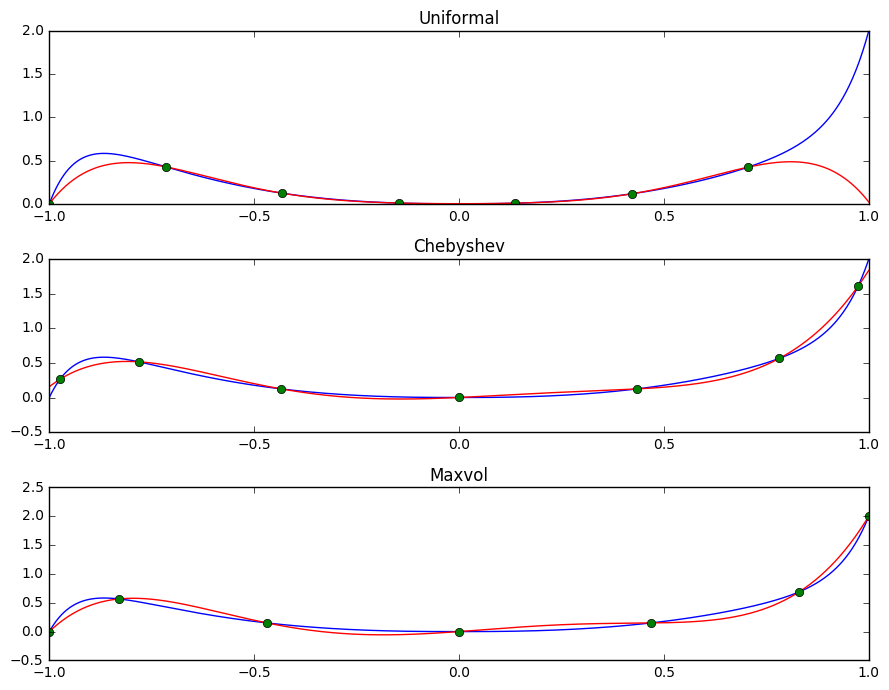

In [28]:
n = 1000       # number of sampling points
m = 6         # degree of polynomial
r = m + 1      # number of pivots 
dom = [-1, 1]  # interval
x = np.linspace(dom[0], dom[1], n)
f = np.sqrt(np.abs(x))**5 + x**15 # function need to be approximated

T_cheb = np.zeros((len(x), r), dtype = np.float32) # T_cheb is a matrix with values of T_i at each point x
for i in range(r):
    T_cheb[:, i] = T.basis(i)(x[:])

row_idx_u = uniformal_points(x, r)
row_idx_c = quasi_chebyshev_points(x, r)
row_idx_m = maxvol_points(r, T_cheb)
    
c = np.linalg.solve(T_cheb[row_idx_u], f[row_idx_u]) # column of coefficients
f_appr_u = np.polynomial.chebyshev.chebval(x, c) 
c = np.linalg.solve(T_cheb[row_idx_c], f[row_idx_c])
f_appr_c = np.polynomial.chebyshev.chebval(x, c) 
c = np.linalg.solve(T_cheb[row_idx_m], f[row_idx_m])
f_appr_m = np.polynomial.chebyshev.chebval(x, c) 


tl, axarr = plt.subplots(3, 1, figsize = (9, 7))
axarr[0].plot(x, f)
axarr[0].plot(x, f_appr_u, color = 'r')
axarr[0].plot(x[row_idx_u], f[row_idx_u], 'o')
axarr[0].set_title('Uniformal')
print('Error_unif = ', la.norm(f - f_appr_u,2) / la.norm(f, 2))
axarr[1].plot(x, f)
axarr[1].plot(x, f_appr_c, color = 'r')
axarr[1].plot(x[row_idx_c], f[row_idx_c], 'o')
axarr[1].set_title('Chebyshev')
print('Error_cheb = ', la.norm(f - f_appr_c,2) / la.norm(f, 2))
axarr[2].plot(x, f)
axarr[2].plot(x, f_appr_m, color = 'r')
axarr[2].plot(x[row_idx_m], f[row_idx_m], 'o')
axarr[2].set_title('Maxvol')
print('Error_maxv = ', la.norm(f - f_appr_m,2) / la.norm(f, 2))
tl.tight_layout()